# TEORIA

## K medias


Se trata de quizás el método más sencillo para hacer clustering. Supongamos que somos un supermercado y queremos entender a nuestros clientes para mejorar nuestras campañas de publicidad.

Mediante encuestas conseguimos un muestreo de 50,000 clientes y para cada uno de ellos conocemos el valor medio de su gasto en nuestro supermercado por semana y su edad.

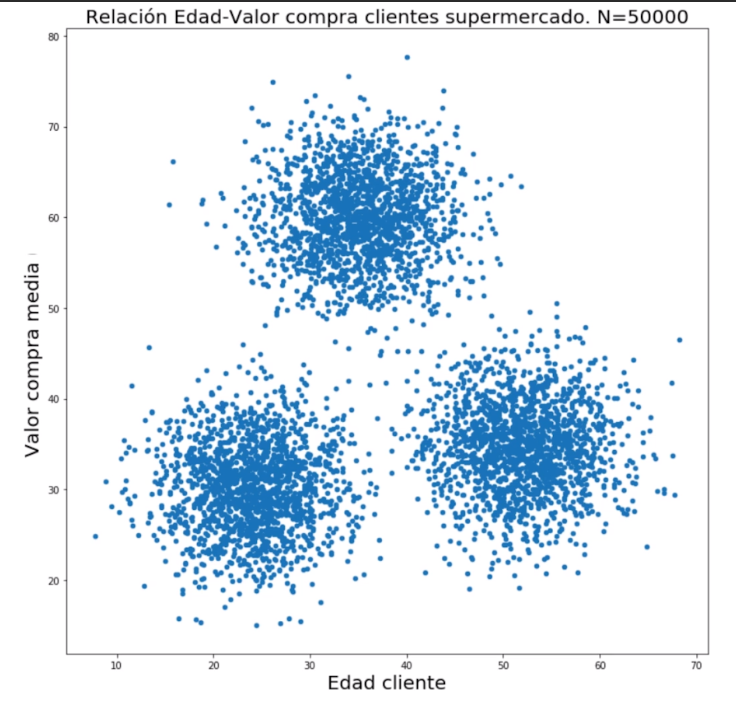

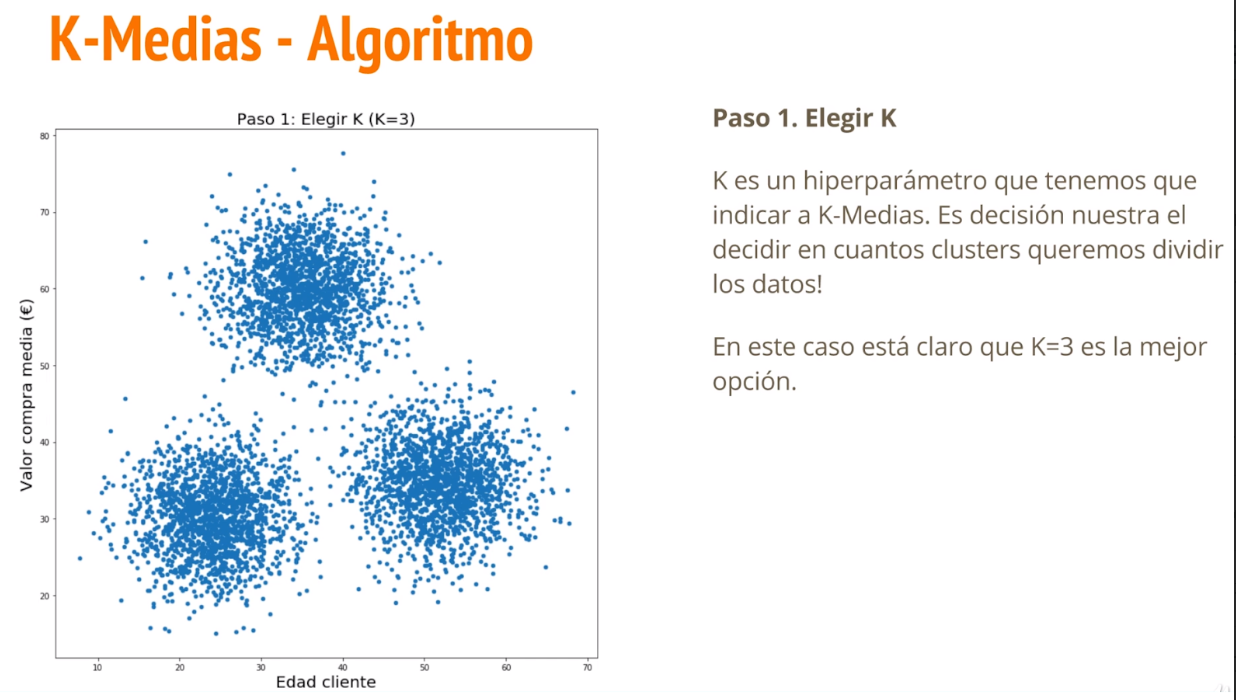

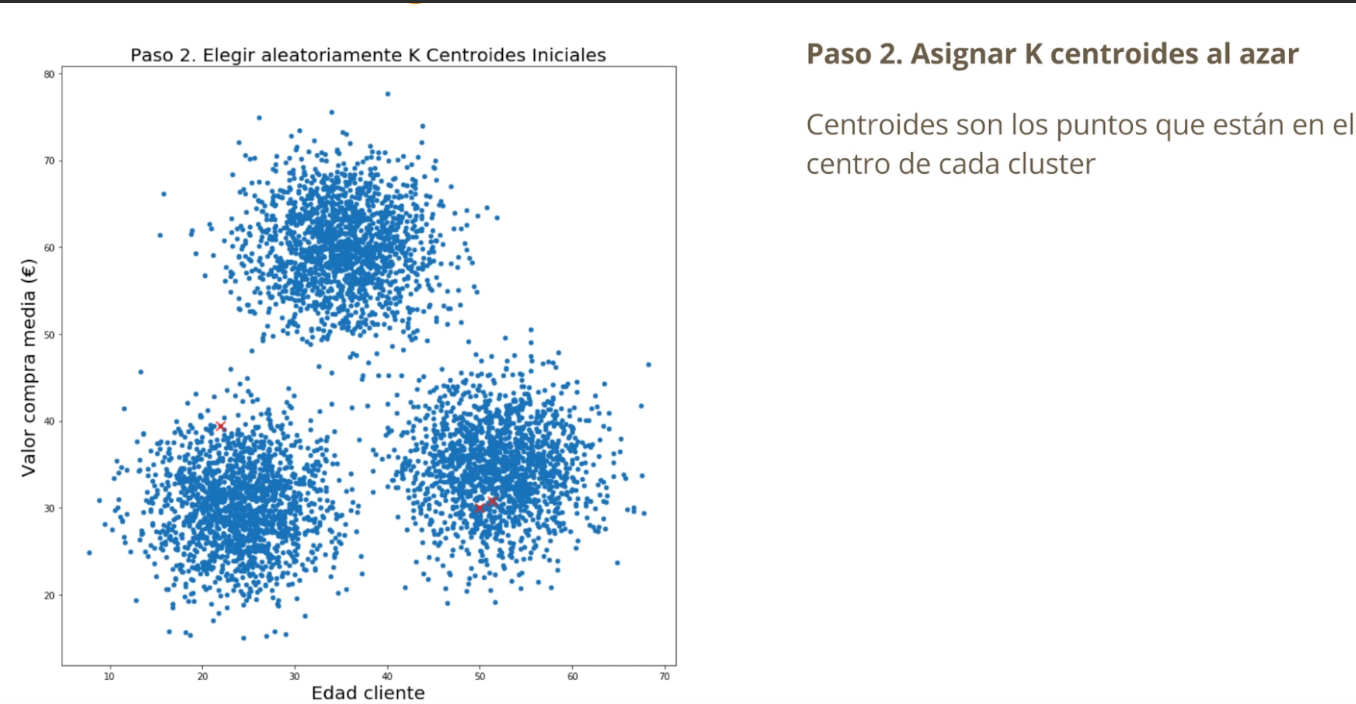

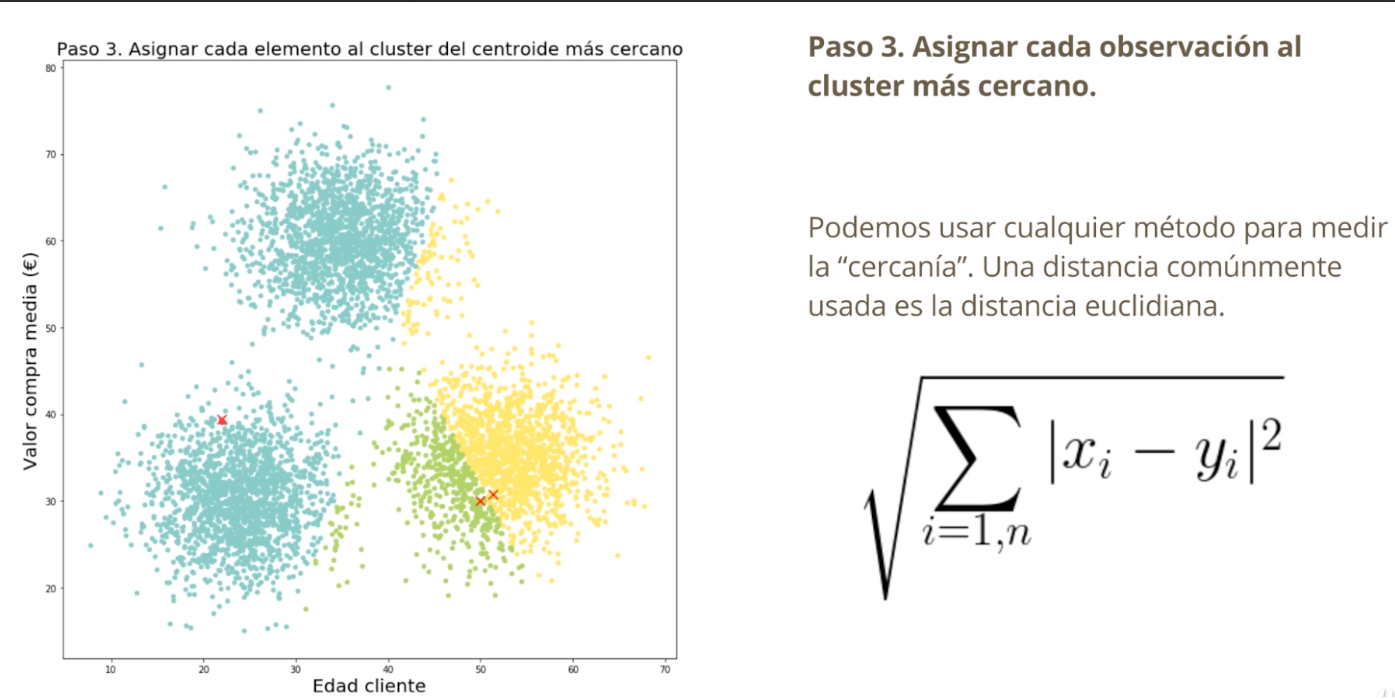

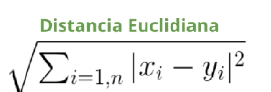

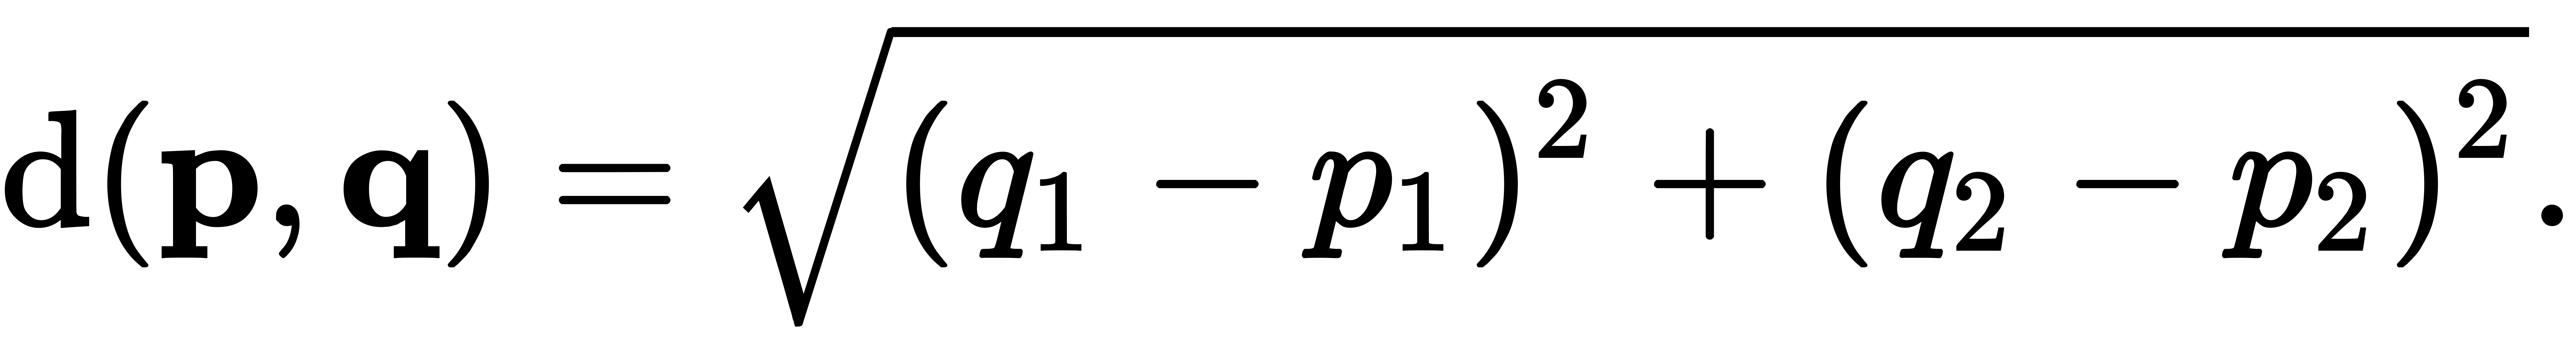

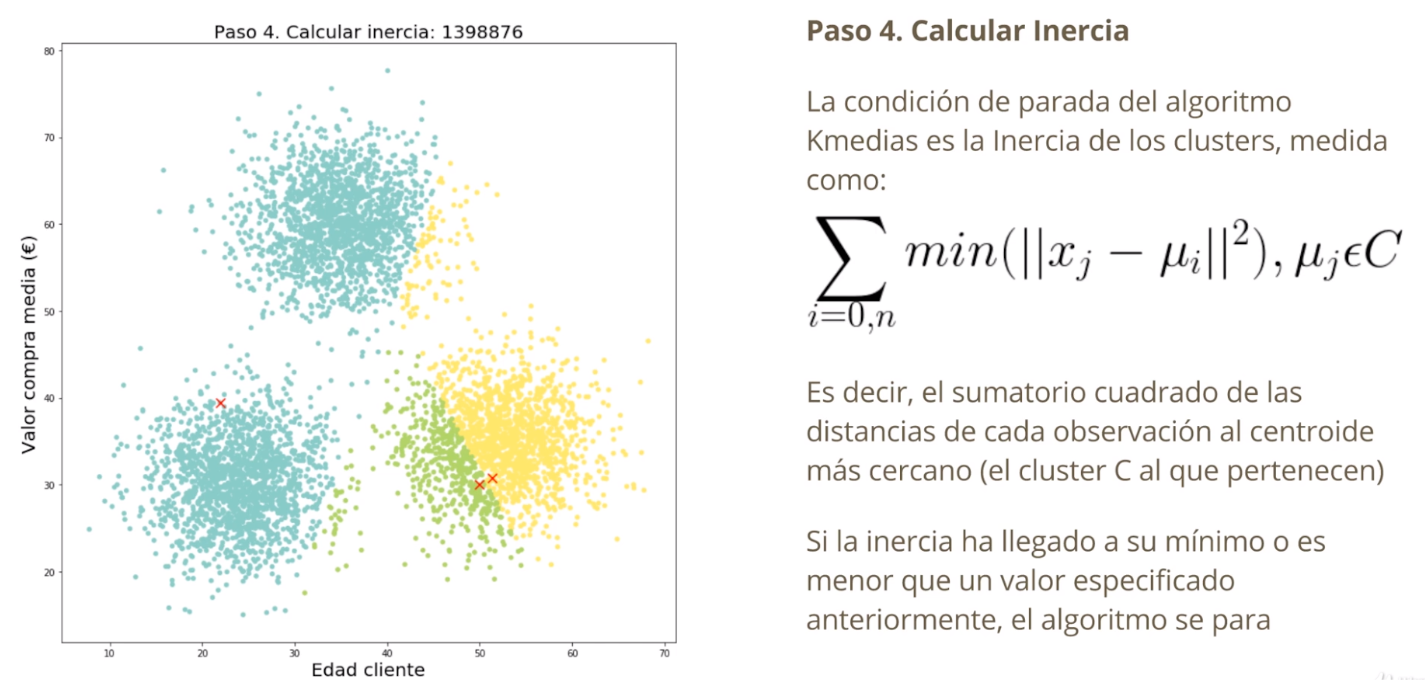

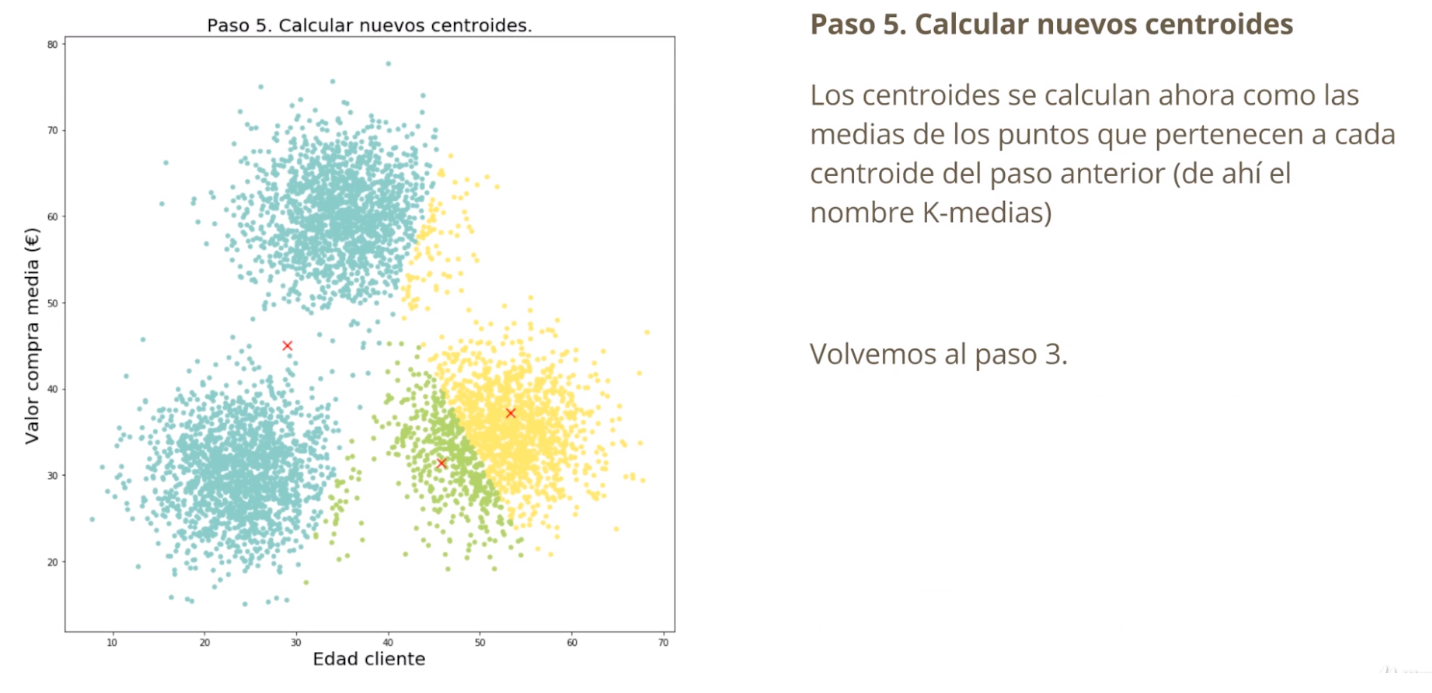

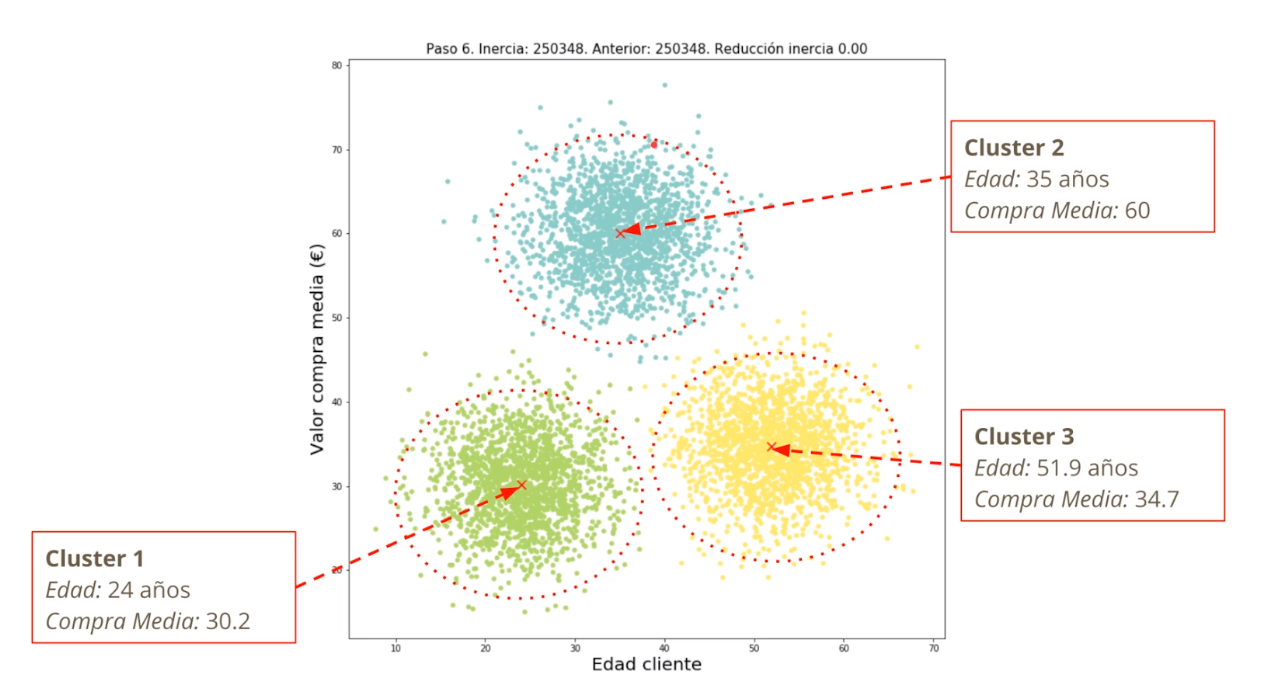

# PRACTICA

In [7]:

import os
import pandas as pd
import numpy as np

from plotnine import *
import plotly.express as px
from plotly.offline import plot

from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer



In [8]:
#%%

url = "https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/Clase3/datos_clientes.csv"

mi_data = pd.read_csv(url)

In [9]:
#%%
# Seleccionar todas las columnas excepto 'Id_cliente'
mi_data = mi_data.drop(columns=['Id_cliente'])

# Reemplazar los valores en la columna 'Genero'
mi_data['Genero'] = mi_data['Genero'].replace({"Female": 1, "Male": 0})

mi_data


Genero  Edad  Ingreso_anual  Puntuacion_gasto
0         0    19             15                39
1         0    21             15                81
2         1    20             16                 6
3         1    23             16                77
4         1    31             17                40
..      ...   ...            ...               ...
195       1    35            120                79
196       1    45            126                28
197       0    32            126                74
198       0    32            137                18
199       0    30            137                83

[200 rows x 4 columns]

Para procesos de algoritmos que tomen en cuenta distancias se toma el escalamiento de cada variable porque puedo tener una columna que tenga numeros del 1 al 1000 y otra de 1 a 10, como son distancias va a tomar estas en base a la distancia mas larga

In [24]:
mi_data.describe()

Genero        Edad  Ingreso_anual  Puntuacion_gasto
count  200.000000  200.000000     200.000000        200.000000
mean     0.560000   38.850000      60.560000         50.200000
std      0.497633   13.969007      26.264721         25.823522
min      0.000000   18.000000      15.000000          1.000000
25%      0.000000   28.750000      41.500000         34.750000
50%      1.000000   36.000000      61.500000         50.000000
75%      1.000000   49.000000      78.000000         73.000000
max      1.000000   70.000000     137.000000         99.000000

In [18]:
escalador = (0**2+19**2+15**2+39**2)**0.5

escalador = [0/escalador, 19/escalador,15/escalador,39/escalador]


In [25]:
escalador = preprocessing.normalize(mi_data)
mi_data_normalizado_df = pd.DataFrame(escalador,
                                      index=mi_data.index,
                                      columns=mi_data.columns)
mi_data_normalizado_df.describe()


Genero        Edad  Ingreso_anual  Puntuacion_gasto
count  200.000000  200.000000     200.000000        200.000000
mean     0.006522    0.438252       0.631148          0.531241
std      0.006479    0.188236       0.187689          0.239303
min      0.000000    0.181117       0.176446          0.011583
25%      0.000000    0.273064       0.522190          0.417630
50%      0.008290    0.396566       0.644129          0.562703
75%      0.011650    0.582110       0.765520          0.679919
max      0.037987    0.957680       0.971821          0.954918

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

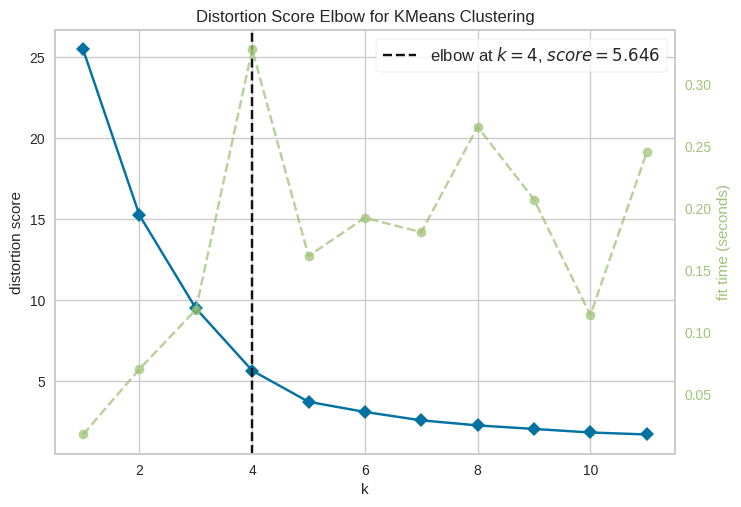

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#%%

from sklearn.cluster import KMeans

modelos = KMeans()

visualizer = KElbowVisualizer(modelos, k=(1,12)) #Se prepare para 12 clusters
visualizer.fit(mi_data_normalizado_df)
visualizer.show()



In [28]:

from sklearn import metrics


# Inicializa una lista vacía para almacenar los scores de distorsión
distortions = []

# Rango de valores para K
K = range(1,13)

# Ajusta el modelo KMeans para cada valor de K y almacena el score de distorsión
for k in K:
    modelos = KMeans(n_clusters=k)
    modelos.fit(mi_data_normalizado_df)
    distortions.append(modelos.inertia_)

# Crea un DataFrame a partir de los scores de distorsión
df_distortions = pd.DataFrame({'K': K, 'Distortion': distortions})

# Muestra el DataFrame
print(df_distortions)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

     K  Distortion
0    1   25.465618
1    2   15.236148
2    3    9.488897
3    4    5.646285
4    5    3.716347
5    6    3.090548
6    7    2.572272
7    8    2.252856
8    9    2.043408
9   10    1.880639
10  11    1.671739
11  12    1.561831


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [29]:
#%%

k_medias = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
k_medias.fit(mi_data_normalizado_df)




KMeans(algorithm='elkan', n_clusters=5, n_init=10, random_state=111)

In [30]:
k_medias.labels_



array([4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 3, 4,
       2, 4, 2, 4, 3, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 3, 4,
       3, 4, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [32]:
k_medias.cluster_centers_


array([[0.0059307 , 0.29110115, 0.69470859, 0.64557879],
       [0.00456987, 0.41186772, 0.87851235, 0.18142035],
       [0.01143712, 0.85167312, 0.44583831, 0.21446944],
       [0.00707609, 0.60465508, 0.575848  , 0.53685403],
       [0.00716645, 0.3109149 , 0.30554666, 0.88974942]])

In [ ]:
#k_medias.predict()
'''
parámetros:
    n_clusters: número de clusters
    init: 'k-means++', 'random' o arreglo de tamaño (n_clusters,n_características)
    n_init: 'auto' o entero. Para correr diferentes inicializaciones (1 si init=k-means++ o 10 si
                                                                      init = random o arreglo)
    max_iter: entero (default = 300); máximo número de iteraciones
'''


In [33]:

mi_data['Etiquetas'] = k_medias.labels_.astype(str)

mi_data

Genero  Edad  Ingreso_anual  Puntuacion_gasto Etiquetas
0         0    19             15                39         4
1         0    21             15                81         4
2         1    20             16                 6         2
3         1    23             16                77         4
4         1    31             17                40         4
..      ...   ...            ...               ...       ...
195       1    35            120                79         0
196       1    45            126                28         1
197       0    32            126                74         0
198       0    32            137                18         1
199       0    30            137                83         0

[200 rows x 5 columns]

In [34]:
fig = px.scatter_3d(mi_data, x='Edad', y='Puntuacion_gasto', z='Ingreso_anual',
              color='Etiquetas')
plot(fig)

'temp-plot.html'

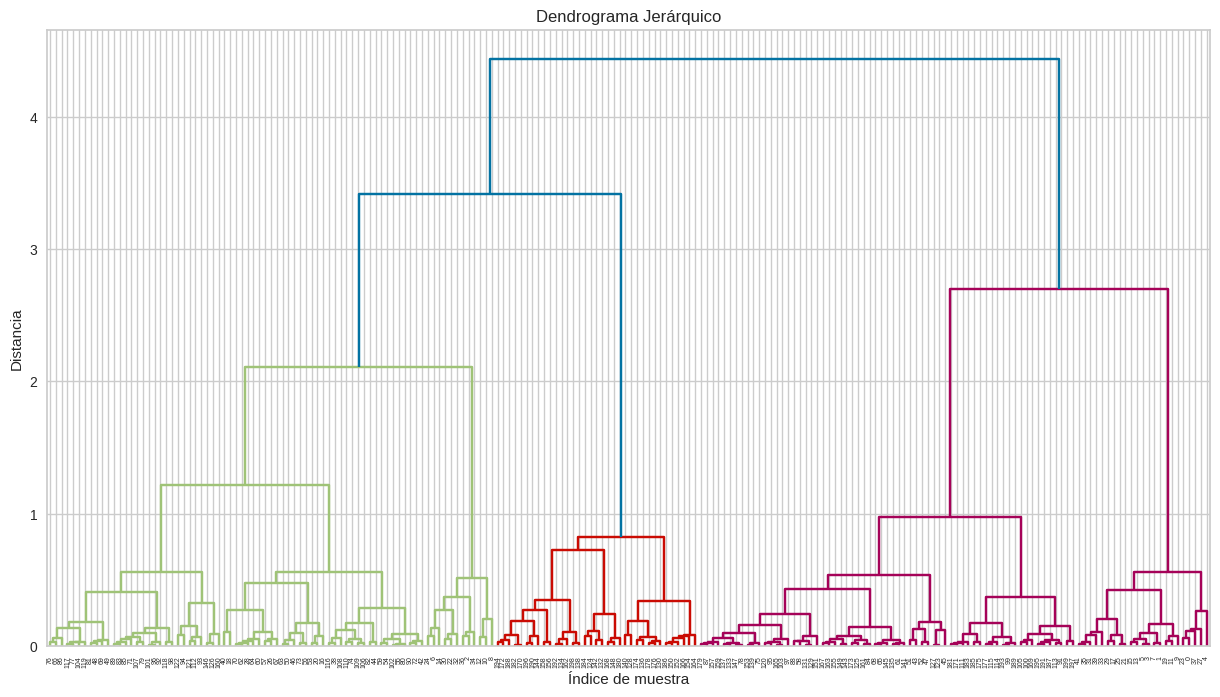

In [37]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Aplicar el algoritmo de clustering jerárquico
enlace = linkage(mi_data_normalizado_df, method='ward')

# Mostrar el dendrograma
plt.figure(figsize=(15, 8))
dendrogram(enlace, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

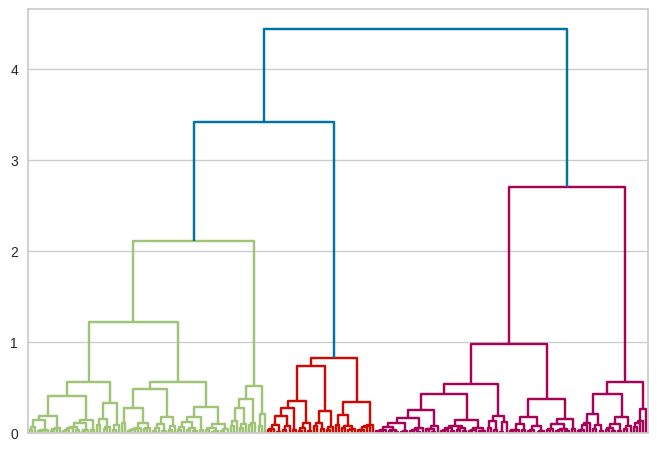

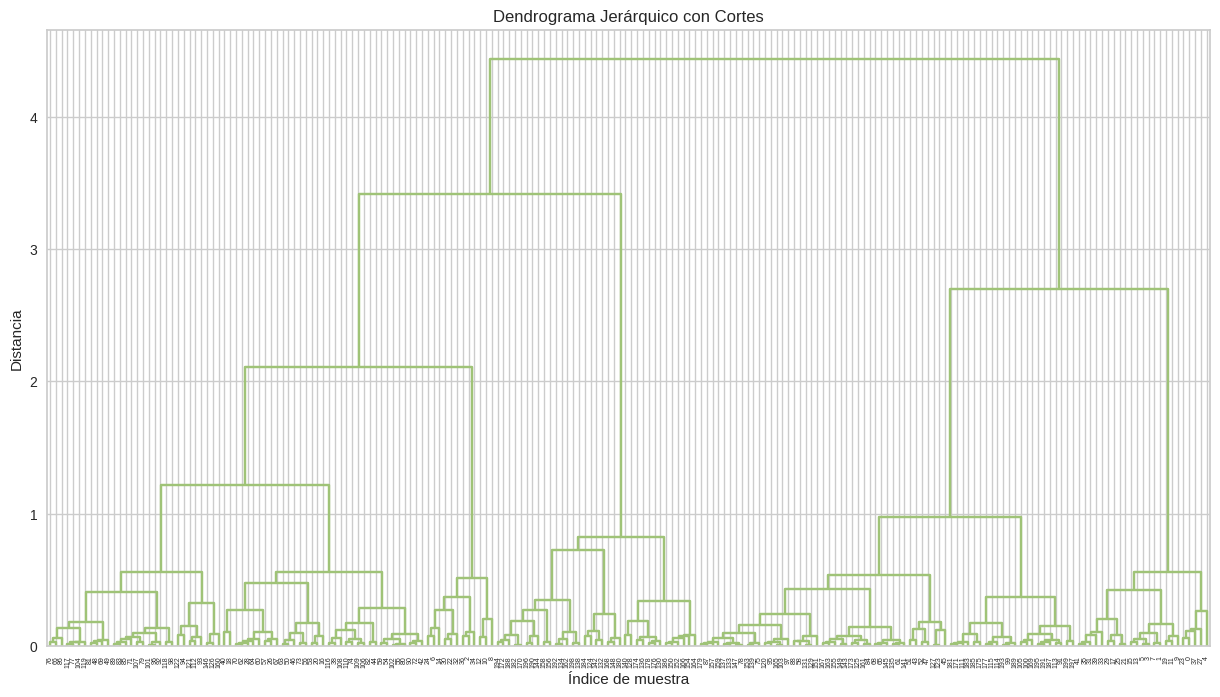

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Aplicar el algoritmo de clustering jerárquico
enlace = linkage(mi_data_normalizado_df, method='ward')

# Determinar la altura de corte para el dendrograma
altura_corte = 200  # Ajusta este valor según tus necesidades

# Generar el dendrograma
dendro = dendrogram(enlace, orientation='top', distance_sort='descending', no_labels=True)

# Cortar el dendrograma en función de la altura especificada
etiquetas_cortadas = fcluster(enlace, altura_corte, criterion='distance')

# Asignar las etiquetas cortadas al DataFrame original
mi_data['Etiquetas_cortadas'] = etiquetas_cortadas.astype(str)

# Mostrar el dendrograma con las etiquetas cortadas
plt.figure(figsize=(15, 8))
dendrogram(enlace, orientation='top', distance_sort='descending', show_leaf_counts=True, color_threshold=altura_corte)
plt.title('Dendrograma Jerárquico con Cortes')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()
